In [1]:
from bs4 import BeautifulSoup

In [2]:
def get_topics_for_reuter(reuter):
    return [d.string for d in reuter.topics.find_all('d')]

def get_text_for_reuter(reuter):
    return reuter.find('text').get_text()

def get_title_for_reuter(reuter):
    title = reuter.find('text').find('title')
    return title.string if title else ''

def get_body_for_reuter(reuter):
    return reuter.find('text').find('body').string

def is_train(reuter):
    return reuter.get('lewissplit').lower() == 'train' and reuter.get('topics').lower() != 'bypass'

def is_test(reuter):
    return reuter.get('lewissplit').lower() == 'test' and reuter.get('topics').lower() != 'bypass'

def can_use(reuter):
    return reuter.get('lewissplit').lower() in ('train', 'test') and reuter.get('topics').lower() == 'yes'

In [3]:
#reuter = soup.find(newid="1")
#get_topics_for_reuter(reuter)
#is_train(reuter)
#is_test(reuter)
#get_title_for_reuter(reuter)
#get_text_for_reuter(reuter)

In [4]:
data = {}

for idx in range(22):
    with open('/home/dehling/Downloads/reuters/reut2-%03d.sgm' % idx, 'rb') as fp:
        #print('Loading reut2-%03d.sgm' % idx)
        soup = BeautifulSoup(fp, from_encoding='ASCII')
        for reuter in soup.find_all('reuters'):
            if can_use(reuter):
                data[reuter.get('newid')] = [
                    reuter.get('newid'),
                    get_topics_for_reuter(reuter),
                    get_title_for_reuter(reuter),
                    get_text_for_reuter(reuter)
                ]

In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(data, orient='index').rename(columns={0: 'ID', 1: 'Topics', 2: 'Title', 3: 'Text'})

In [18]:
import unicodedata

def remove_non_ascii(s):
    return s.encode('ascii', 'ignore').decode('utf-8')

def remove_control_characters(s):
    return ''.join(c for c in s if unicodedata.category(c)[0] != 'C')

df['Text'] = df['Text'] \
    .apply(remove_non_ascii) \
    .apply(strip_multiple_whitespaces) \
    .apply(remove_control_characters)

In [19]:
from gensim.parsing.preprocessing import strip_tags, strip_multiple_whitespaces, strip_non_alphanum, strip_punctuation, \
    strip_short, remove_stopwords, preprocess_string

my_filters = [
    lambda x: x.lower(), strip_tags, strip_non_alphanum, strip_multiple_whitespaces,
    strip_punctuation, strip_short, remove_stopwords
]

#df['Title'] = df['Title'].apply(lambda x: ' '.join(preprocess_string(x, my_filters)))
df['TextClean'] = df['Text'].apply(lambda x: ' '.join(preprocess_string(x, my_filters)))

#df.drop(['Title'], axis=1, inplace=True)
#df.drop(['Title', 'Text'], axis=1, inplace=True)

In [8]:
#df['Title'] = df['Title'].apply(lambda x: ' '.join(x))
#df['Text'] = df['Text'].apply(lambda x: ' '.join(x))

In [20]:
df.head(n=10)

,ID,Topics,Text,TextClean
8937,8937,[],"TIME <TL> BEGINS DEBT TENDER, FILES SHELF NEW...",time begins debt tender files shelf new york m...
10337,10337,"[money-fx, dlr]",****** Bundesbank bought dollars against yen ...,bundesbank bought dollars yen frankfurt dealer...
10811,10811,[gold],"PERU ANNOUNCES LARGE NEW GOLD FIND LIMA, Marc...",peru announces large new gold lima march presi...
10634,10634,[reserves],CHINA FOREIGN RESERVES EXCEED 10 BILLION DLRS...,china foreign reserves exceed billion dlrs pek...
5596,5596,[acq],CHEYENNE SOFTWARE <CHEY> IN ACQUISITION TALKS...,cheyenne software acquisition talks roslyn mar...
530,530,[earn],GELCO CORP <GEL> 2ND QTR JAN 31 NET EDEN PRAI...,gelco corp 2nd qtr jan net eden prairie minn m...
4062,4062,[reserves],****** German net currency reserves rise 400 ...,german net currency reserves rise 400 mln mark...
12753,12753,"[meal-feed, soy-meal]",EUROPEAN SOY/FEED MARKET OPENS QUIETLY ROTTER...,european soy feed market opens quietly rotterd...
15669,15669,[earn],RULE INDUSTRIES INC <RULE> 2ND QTR FEB 28 NET...,rule industries 2nd qtr feb net gloucester mas...
16512,16512,[acq],ATLANTIC FINANCIAL <ATLF.O> TO ACQUIRE S AND ...,atlantic financial acquire bala cynwyd april a...


In [21]:
df.shape

(12902, 4)

In [56]:
#df['Topics'] = df['Topics'].apply(lambda x: ','.join(x)).astype(str)
#df.to_csv('data/reuters21578.csv', index=False, columns=['Topics', 'Title', 'Text'])

In [58]:
import pandas as pd
df = pd.read_csv('data/reuters21578.csv', index_col=None, dtype={'Topics': str, 'Title': str, 'Text': str})

In [60]:
df['Topics'] = df['Topics'].fillna('').apply(lambda x: x.split(','))

In [61]:
df.head(n=25)

,Topics,Title,Text
0,[ship],biffex members ballot merger,biffex members ballot merger london march memb...
1,[earn],thackeray corp year loss,thackeray corp year loss new york march oper s...
2,[earn],commonwealth edison months net,commonwealth edison months net chicago march p...
3,[sugar],kaines confirms white sugar sales india,kaines confirms white sugar sales india london...
4,[earn],ford nears executive bonuses,ford nears executive bonuses detroit march for...
5,[],gmac canada unit issues canadian dollar bond,gmac canada unit issues canadian dollar bond l...
6,[],money managers lean stocks bonds,money managers lean stocks bonds martin cherri...
7,[money-supply],business loans fall 718 mln dlrs march week fe...,business loans fall 718 mln dlrs march week fe...
8,[earn],gatx corp 3rd qtr net,gatx corp 3rd qtr net chicago oct shr cts cts ...
9,[earn],lands end year jan net,lands end year jan net dodgeville wis march sh...


In [30]:
from operator import itemgetter

topic_freqs = {}

for topics in df['Topics']:
    for topic in topics:
        if topic not in topic_freqs:
            topic_freqs[topic] = 0
        topic_freqs[topic] += 1
    
topic_freqs = sorted(topic_freqs.items(), key=itemgetter(1), reverse=True)

labels_all = [x[0] for x in topic_freqs if x[1] > 5]

labels_top50 = labels_all[:50]
labels_top20 = labels_all[:20]
labels_top10 = labels_all[:10]
labels_top5 = labels_all[:5]

In [31]:
labels_top10

['earn',
 'acq',
 'nan',
 'money-fx',
 'grain',
 'crude',
 'trade',
 'interest',
 'ship',
 'wheat']

In [32]:
len(labels_all)

77

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

X_count_unfiltered = CountVectorizer().fit_transform(df['Text'].values)
X_tfidf_unfiltered = TfidfVectorizer().fit_transform(df['Text'].values)

X_count = CountVectorizer(min_df=25, max_df=0.5).fit_transform(df['Text'].values)
X_tfidf = TfidfVectorizer(min_df=25, max_df=0.5).fit_transform(df['Text'].values)

X_ngram = CountVectorizer(min_df=50, max_df=0.5, analyzer='char', ngram_range=(3,3)).fit_transform(df['Text'].values)

In [65]:
from scipy.sparse import hstack

X_all = hstack((X_count, X_ngram))

In [66]:
X_count

<12902x3865 sparse matrix of type '<class 'numpy.int64'>'
	with 548564 stored elements in Compressed Sparse Row format>

In [67]:
X_ngram

<12902x4058 sparse matrix of type '<class 'numpy.int64'>'
	with 3357870 stored elements in Compressed Sparse Row format>

In [68]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=500, n_iter=10)

X_count_lsi = tsvd.fit_transform(X_count_unfiltered)

X_tfidf_lsi = tsvd.fit_transform(X_tfidf_unfiltered)

In [82]:
#tsvd.explained_variance_ratio_.sum()

In [69]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.naive_bayes import MultinomialNB

y_earn = df['Topics'].apply(lambda x: 'earn' in x).values
y_acq = df['Topics'].apply(lambda x: 'acq' in x).values
y_money_fx = df['Topics'].apply(lambda x: 'money-fx' in x).values

cv = ShuffleSplit(n_splits=5, test_size=0.2)

scores = cross_val_score(MultinomialNB(), X_count, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_count, y_acq, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_count, y_money_fx, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.97 (+/- 0.00)
Score: 0.93 (+/- 0.01)
Score: 0.94 (+/- 0.00)


In [70]:
scores = cross_val_score(MultinomialNB(), X_count_unfiltered, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_count, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_tfidf, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_ngram, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(MultinomialNB(), X_all, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Doesn't work because of negative values (?)
#scores = cross_val_score(MultinomialNB(), X_lsi, y_earn, cv=cv)
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.96 (+/- 0.00)
Score: 0.97 (+/- 0.00)
Score: 0.97 (+/- 0.00)
Score: 0.95 (+/- 0.00)
Score: 0.96 (+/- 0.00)


In [71]:
from sklearn.linear_model import LogisticRegression


scores = cross_val_score(LogisticRegression(), X_count_unfiltered, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LogisticRegression(), X_count, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LogisticRegression(), X_tfidf, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LogisticRegression(), X_ngram, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(LogisticRegression(), X_count_lsi, y_earn, cv=cv)
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(LogisticRegression(), X_tfidf_lsi, y_earn, cv=cv)
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.98 (+/- 0.00)
Score: 0.99 (+/- 0.00)
Score: 0.98 (+/- 0.00)
Score: 0.98 (+/- 0.00)


In [72]:
from sklearn.svm import LinearSVC

scores = cross_val_score(LinearSVC(), X_count, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LinearSVC(), X_tfidf, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LinearSVC(), X_tfidf, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LinearSVC(), X_ngram, y_earn, cv=cv)
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(LinearSVC(), X_count_lsi, y_earn, cv=cv)
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(LinearSVC(), X_tfidf_lsi, y_earn, cv=cv)
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.98 (+/- 0.00)
Score: 0.98 (+/- 0.00)
Score: 0.99 (+/- 0.00)
Score: 0.98 (+/- 0.00)


In [73]:
from sklearn.preprocessing import MultiLabelBinarizer

def keep_only_included(labels):
    return [x for x in labels if x in labels_all]

mlb = MultiLabelBinarizer(classes=labels_all)
y = mlb.fit_transform(df['Topics'].apply(keep_only_included).values)

In [74]:
y.shape

(12902, 77)

In [70]:
#from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold(n_splits=5, shuffle=True)
# NOTE: Doesn't work because of multilabel situation...

In [60]:
import warnings

warnings.filterwarnings("ignore")

In [61]:
from sklearn.multiclass import OneVsRestClassifier

scores = cross_val_score(OneVsRestClassifier(MultinomialNB()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(OneVsRestClassifier(MultinomialNB()), X_tfidf, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(OneVsRestClassifier(MultinomialNB()), X_ngram, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(OneVsRestClassifier(MultinomialNB()), X_lsi, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.24 (+/- 0.01)
Score: 0.12 (+/- 0.00)
Score: 0.25 (+/- 0.01)


In [63]:
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(OneVsRestClassifier(LogisticRegression()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(OneVsRestClassifier(LogisticRegression()), X_tfidf, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(OneVsRestClassifier(LogisticRegression()), X_ngram, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(OneVsRestClassifier(LogisticRegression()), X_count_lsi, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(OneVsRestClassifier(LogisticRegression()), X_tfidf_lsi, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.55 (+/- 0.03)
Score: 0.22 (+/- 0.01)
Score: 0.55 (+/- 0.02)


In [65]:
scores = cross_val_score(OneVsRestClassifier(LinearSVC(C=0.5, dual=False)), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(OneVsRestClassifier(LinearSVC(C=10.0, dual=False)), X_tfidf, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(OneVsRestClassifier(LinearSVC(C=0.5, dual=False)), X_ngram, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(OneVsRestClassifier(LinearSVC(C=0.5, dual=False)), X_count_lsi, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(OneVsRestClassifier(LinearSVC(C=0.5, dual=False)), X_tfidf_lsi, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.59 (+/- 0.01)
Score: 0.61 (+/- 0.02)
Score: 0.56 (+/- 0.03)


In [66]:
scores = cross_val_score(OneVsRestClassifier(LinearSVC(dual=False)), X_all, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.60 (+/- 0.02)


In [ ]:
from sklearnearn.pipeline import make_pipeline

pipe = make_pipeline([
    CountVectorizer(),
    BinaryRelevance(LinearSVC())
])

In [ ]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(
    BinaryRelevance(LinearSVC(C=10.0, dual=False, penalty='l2')),
    {
        'classifier__C': [5.0, 10.0, 20.0],
        #'classifier__dual': [False, True],
        #'classifier__penalty': ['l1', 'l2'],
    },
    scoring='f1_macro',
    cv=cv,
    n_jobs=4,
    verbose=5
)

results = gscv.fit(X_tfidf, y)

In [107]:
results.best_params_

{'classifier__C': 10.0}

In [108]:
results.best_score_

0.7544819354761562

In [67]:
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset

scores = cross_val_score(BinaryRelevance(MultinomialNB()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(ClassifierChain(MultinomialNB()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LabelPowerset(MultinomialNB()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.24 (+/- 0.00)
Score: 0.20 (+/- 0.01)
Score: 0.43 (+/- 0.01)


In [ ]:
scores = cross_val_score(BinaryRelevance(LogisticRegression()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(ClassifierChain(LogisticRegression()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LabelPowerset(LogisticRegression()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [102]:
scores = cross_val_score(BinaryRelevance(LinearSVC(C=10.0, dual=False)), X_tfidf, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(ClassifierChain(LinearSVC(C=10.0, dual=False)), X_tfidf, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(LabelPowerset(LinearSVC(C=10.0, dual=False)), X_tfidf, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

Score: 0.76 (+/- 0.01)
Score: 0.77 (+/- 0.02)


/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dehling/Documents/machine-learnings/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score: 0.71 (+/- 0.01)


In [ ]:
scores = cross_val_score(ClassifierChain(LinearSVC()), X_lsi, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(ClassifierChain(LinearSVC(class_weight='balanced')), X_lsi, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [ ]:
scores = cross_val_score(ClassifierChain(LogisticRegression()), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(ClassifierChain(LogisticRegression(class_weight='balanced')), X_count, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [53]:
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.ensemble import RakelO, RakelD

scores = cross_val_score(RakelD(LabelPowerset(MultinomialNB()), labelset_size=2),
                         X, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(RakelD(LabelPowerset(MultinomialNB()), labelset_size=4),
                         X, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores = cross_val_score(RakelD(LabelPowerset(MultinomialNB()), labelset_size=8),
                         X, y, cv=cv, scoring='f1_macro')
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(RakelD(LabelPowerset(LogisticRegression()), labelset_size=2),
#                         X, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#
#scores = cross_val_score(RakelD(LabelPowerset(LogisticRegression()), labelset_size=4),
#                         X, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#
#scores = cross_val_score(RakelD(LabelPowerset(LogisticRegression()), labelset_size=8),
#                         X, y, cv=cv, scoring='f1_macro')
#print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.49 (+/- 0.00)
Score: 0.53 (+/- 0.01)
Score: 0.60 (+/- 0.01)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test), target_names=mlb.classes_))

              precision    recall  f1-score   support

        earn       0.97      0.95      0.96       840
         acq       0.72      0.97      0.83       432
    money-fx       0.47      0.98      0.63       128
       grain       0.55      0.98      0.71       130
       crude       0.56      0.95      0.71       108
       trade       0.38      0.93      0.54       102
    interest       0.35      0.96      0.51        84
        ship       0.34      0.96      0.50        53
       wheat       0.31      0.97      0.47        62
        corn       0.28      1.00      0.43        52
         dlr       0.21      0.97      0.34        34
money-supply       0.23      0.97      0.37        36
     oilseed       0.14      0.96      0.24        28
       sugar       0.17      0.97      0.28        35
      coffee       0.26      0.97      0.41        29
         gnp       0.16      0.93      0.28        27
        gold       0.41      1.00      0.59        24
     veg-oil       0.16    

In [35]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test), target_names=mlb.classes_))

              precision    recall  f1-score   support

        earn       0.99      0.97      0.98       840
         acq       0.93      0.92      0.93       432
    money-fx       0.88      0.84      0.86       128
       grain       0.96      0.92      0.94       130
       crude       0.88      0.85      0.86       108
       trade       0.87      0.78      0.82       102
    interest       0.70      0.68      0.69        84
        ship       0.81      0.81      0.81        53
       wheat       0.91      0.77      0.83        62
        corn       0.98      0.88      0.93        52
         dlr       0.82      0.68      0.74        34
money-supply       0.77      0.67      0.72        36
     oilseed       0.70      0.57      0.63        28
       sugar       1.00      0.83      0.91        35
      coffee       0.96      0.90      0.93        29
         gnp       0.96      0.81      0.88        27
        gold       0.95      0.83      0.89        24
     veg-oil       0.93    

In [38]:
clf = ClassifierChain(LogisticRegression(class_weight='balanced'))
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test), target_names=mlb.classes_))

              precision    recall  f1-score   support

        earn       0.98      0.98      0.98       840
         acq       0.91      0.95      0.93       432
    money-fx       0.78      0.88      0.83       128
       grain       0.93      0.95      0.94       130
       crude       0.82      0.89      0.85       108
       trade       0.81      0.84      0.83       102
    interest       0.66      0.86      0.75        84
        ship       0.70      0.89      0.78        53
       wheat       0.84      0.82      0.83        62
        corn       0.89      0.92      0.91        52
         dlr       0.63      0.85      0.72        34
money-supply       0.71      0.83      0.77        36
     oilseed       0.45      0.61      0.52        28
       sugar       0.94      0.86      0.90        35
      coffee       0.96      0.93      0.95        29
         gnp       0.81      0.96      0.88        27
        gold       0.92      0.96      0.94        24
     veg-oil       0.90    

In [63]:
clf = ClassifierChain(LinearSVC())
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test), target_names=mlb.classes_))

              precision    recall  f1-score   support

        earn       0.98      0.97      0.97       801
         acq       0.89      0.92      0.91       463
    money-fx       0.78      0.74      0.76       159
       grain       0.95      0.92      0.94       115
       crude       0.80      0.86      0.83       107
       trade       0.80      0.75      0.77        96
    interest       0.63      0.62      0.62        95
        ship       0.82      0.89      0.85        46
       wheat       0.93      0.93      0.93        56
        corn       0.98      0.82      0.89        51
         dlr       0.73      0.79      0.76        42
money-supply       0.73      0.89      0.80        37
     oilseed       0.61      0.57      0.59        30
       sugar       0.93      0.90      0.92        31
      coffee       0.96      0.92      0.94        24
         gnp       0.83      0.80      0.81        30
        gold       0.89      0.89      0.89        35
     veg-oil       0.91    

In [27]:
from mlxtend.plotting import plot_learning_curves

%matplotlib inline

_ = plot_learning_curves(X_train, y_train, X_test, y_test, ClassifierChain(LinearSVC(C=10.0, dual=False)),
                         scoring='f1_macro', print_model=False)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

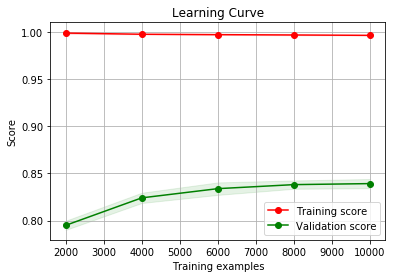

In [32]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
import numpy as np

plt.figure()
plt.title('Learning Curve')
#plt.ylim(0.7, 0.9)
plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes, train_scores, test_scores = learning_curve(
    ClassifierChain(LinearSVC(C=10.0, dual=False)), X_tfidf, y, cv=cv,
    n_jobs=4, train_sizes=[2000, 4000, 6000, 8000, 10000])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")
plt.legend(loc="best")